# Set Up

In [147]:
from google.colab import drive
drive.mount('/content/drive')

%load_ext autoreload
%autoreload 2


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [148]:
REPO_LOC = "/content/drive/MyDrive/Trajectories/rhexis-trajectory"
DATA_LOC = "/content/drive/MyDrive/Trajectories/datasets/Dataset_1000"


import sys
sys.path.insert(0,f"{REPO_LOC}/ImageSize_Conversion")

New data location: where all the images and new jsons will be saved

In [149]:
STANDARD_SIZE = (720, 480)

NEW_DATA_LOC = "/content/drive/MyDrive/Trajectories/datasets/Dataset_1000_RESIZED"

NEW_DATA_LOC = NEW_DATA_LOC + f"_{STANDARD_SIZE[0]}_{STANDARD_SIZE[1]}"

Subdirectory Names: Names of the dataset folder subdirectories that must be treated seperately

In [150]:
subdir_names = ["train_set", "test_set", "val_set"]

# Resize Images

In [151]:
import resize_utils as ru
stack_list, img_data_list = ru.read_in_all_images(DATA_LOC, STANDARD_SIZE, subdir_names)

Loading in and resizing images from {name}:
800 image files detected

Images loaded and resized successfully
Returned stack has size NxHxWxC: (800, 480, 720, 3)
Loading in and resizing images from {name}:
100 image files detected

Images loaded and resized successfully
Returned stack has size NxHxWxC: (100, 480, 720, 3)
Loading in and resizing images from {name}:
100 image files detected

Images loaded and resized successfully
Returned stack has size NxHxWxC: (100, 480, 720, 3)


In [152]:
ru.create_resized_images_all(stack_list, img_data_list, NEW_DATA_LOC, subdir_names)

train_set label folder already exists

Successfully saved 800 resized images for train_set

test_set label folder already exists

Successfully saved 100 resized images for test_set

val_set label folder already exists

Successfully saved 100 resized images for val_set



# Correct JSON files

In [153]:
json_dict_list = ru.correct_all_json_files(STANDARD_SIZE, DATA_LOC, NEW_DATA_LOC, img_data_list, subdir_names)

In [154]:
for item in json_dict_list[0].items():
  print(item[0])
  print(item[1])
  print()

licenses
[{'name': '', 'id': 0, 'url': ''}]

info
{'contributor': '', 'date_created': '', 'description': '', 'url': '', 'version': '', 'year': ''}

categories
[{'id': 1, 'name': 'utrada tip', 'supercategory': '', 'keypoints': [], 'skeleton': []}]

images
[{'id': 1, 'width': 720, 'height': 480, 'file_name': 'Medi_09.22.20_1_rhexis_895.jpg', 'license': 0, 'flickr_url': '', 'coco_url': '', 'date_captured': 0}, {'id': 2, 'width': 720, 'height': 480, 'file_name': 'Medi_09.22.20_1_rhexis_754.jpg', 'license': 0, 'flickr_url': '', 'coco_url': '', 'date_captured': 0}, {'id': 3, 'width': 720, 'height': 480, 'file_name': 'Medi_09.22.20_1_rhexis_728.jpg', 'license': 0, 'flickr_url': '', 'coco_url': '', 'date_captured': 0}, {'id': 4, 'width': 720, 'height': 480, 'file_name': 'Medi_09.22.20_1_rhexis_726.jpg', 'license': 0, 'flickr_url': '', 'coco_url': '', 'date_captured': 0}, {'id': 5, 'width': 720, 'height': 480, 'file_name': 'Medi_09.22.20_1_rhexis_655.jpg', 'license': 0, 'flickr_url': '', 'coco_

# Tests to make sure bbox and keypoints are correct

ORIGINAL IMAGE
/content/drive/MyDrive/Trajectories/datasets/Dataset_1000/train_set/images/Medi_09.22.20_1_rhexis_622.jpg
Image ID: 6
=JSON_DATA=
images
{'id': 6, 'width': 712, 'height': 478, 'file_name': 'Medi_09.22.20_1_rhexis_622.jpg', 'license': 0, 'flickr_url': '', 'coco_url': '', 'date_captured': 0}
annotations
{'id': 6, 'image_id': 6, 'category_id': 1, 'segmentation': [], 'area': 15034.9689, 'bbox': [546.26, 309.75, 89.67, 167.67], 'iscrowd': 0, 'attributes': {'occluded': False}, 'num_keypoints': 2, 'keypoints': [566.22, 323.62, 2, 566.22, 323.62, 2]}
bbox: [546.26, 309.75, 89.67, 167.67]
keypoints: [566.22, 323.62, 2, 566.22, 323.62, 2]
Image size:(478, 712, 3)


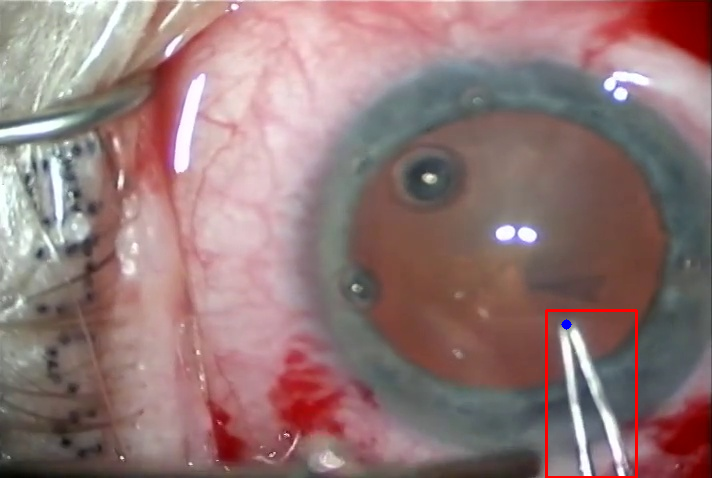

RESIZED IMAGE
/content/drive/MyDrive/Trajectories/datasets/Dataset_1000_RESIZED_720_480/train_set/images/Medi_09.22.20_1_rhexis_622.jpg
Image ID: 6
=JSON_DATA=
images
{'id': 6, 'width': 720, 'height': 480, 'file_name': 'Medi_09.22.20_1_rhexis_622.jpg', 'license': 0, 'flickr_url': '', 'coco_url': '', 'date_captured': 0}
annotations
{'id': 6, 'image_id': 6, 'category_id': 1, 'segmentation': [], 'area': 15267.9775, 'bbox': [548.55, 313.23, 90.05, 169.55], 'iscrowd': 0, 'attributes': {'occluded': False}, 'num_keypoints': 2, 'keypoints': [568.59, 327.26, 2, 568.59, 327.26, 2]}
bbox: [548.55, 313.23, 90.05, 169.55]
keypoints: [568.59, 327.26, 2, 568.59, 327.26, 2]
Image size:(480, 720, 3)


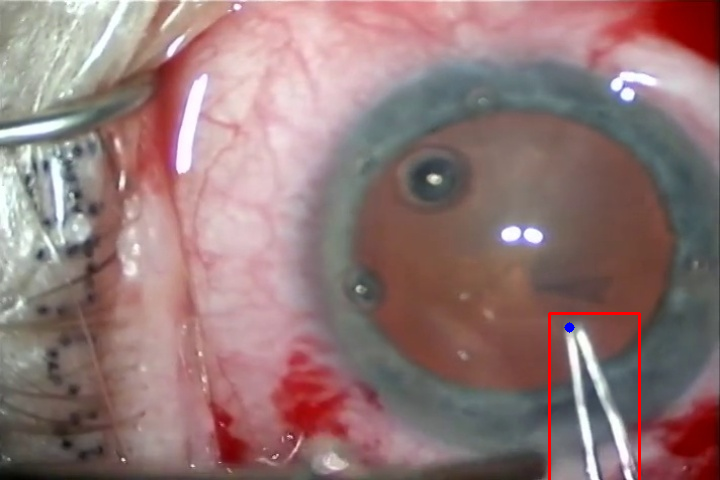

In [155]:
import test_utils as tu

test_subdir = 'train_set'
test_index = 5

tu.display_annotations_both(test_subdir, test_index, DATA_LOC, NEW_DATA_LOC)